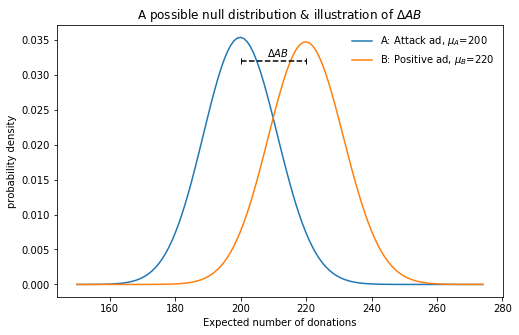

In [65]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(8)
n = 550
pA, pB = 220./n, 200./n

x = np.arange(150, 275)

ax.plot(x, binom.pmf(x, n, pB), label='A: Attack ad, $\mu_A$=200')
ax.plot(x, binom.pmf(x, n, pA), label='B: Positive ad, $\mu_B$=220')

ax.plot([200, 220], [0.032, 0.032], 'k', linestyle='--', marker='|')
ax.text(208, 0.0325, '$\Delta AB$')


ax.set_ylabel('probability density')
ax.set_xlabel('Expected number of donations')
ax.set_title('A possible null distribution & illustration of $\Delta AB$')

ax.legend(loc='best', frameon=False)
plt.savefig('AB_binomial_model.png')
plt.show()


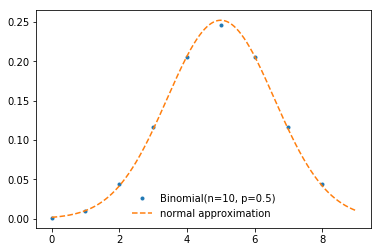

In [80]:
import numpy as np
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
figsize = (10, 10)
n, p = 10, 0.5



def sigma_approx(n, p):
    return np.sqrt(n * p * (1 - p))

# ppf means 'point percent function' and tells you what the x-location of the 
# distribution is where 0.99, say, fraction of area under the function is to the 
# left of x. 
x_max = binom.ppf(0.99, n, p)
x_norm = np.linspace(0, x_max, 1000)
x_binom = np.arange(0, x_max)

# binom has a 'pmf' (probability *mass* function) because it's discrete.
ax.plot(x_binom, binom.pmf(x_binom, n, p), '.', 
        label='Binomial(n={}, p={})'.format(n, p))

# norm has a 'pdf' (probability *density* function) because it's continuous. 
ax.plot(x_norm, norm.pdf(x_norm, loc=p*n, scale=sigma_approx(n, p)), 
        linestyle='--', label='normal approximation')


ax.legend(loc='best', frameon=False)
plt.show()